In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Discrete Calculus

Calculus is the mathematics of the infinitly small and infinitely big. Conversely, discrete calculus only deals with finite quantities. nevertheless, most of the rules and procedures of discrete caclulus are either similar or identical to the rules of regular caclulus. 

### Discrete functions

The object of study of discrete caclulus are discrete functions. A discrete function is a rule that assigns a numeric value for a finite number of integers.

For example, consider the set of integers $\{0,1,2,3,4\}$. We can defini the following discrete function:

$$
f(n) = n^2~.
$$

We can enumerate all possible values of this discrete square function:

$$
f(0) = 0, 
$$
$$
f(1) = 1, 
$$
$$
f(2) = 4, 
$$
$$
f(3) = 9, 
$$
$$
f(4) = 16.
$$

A discrete function can be graphed as a staircase with as many steps as the number of values. This visualization is shown in the next Python block.

Text(0.5,1,'Discrete function')

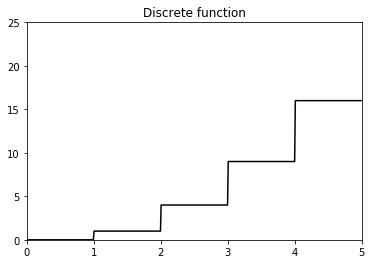

In [38]:
def discrete_square(x, N, dx):
    for n in range(N):
        if n*dx <= x < (n+1)*dx:
            return (n*dx)**2

N = 5
L = 5
dx = L/N
n_range = range(0,N)
x_range = np.linspace(0,L,100*N)

f_x = [discrete_square(x, N, dx) for x in x_range]
plt.plot(x_range, f_x, c="k")
plt.ylim(0,L**2)
plt.xlim(0,L)
plt.title("Discrete function")

### The area under a discrete function: The discrete integral


It is often interesting to compute the area under a curve. In discrete caclulus, we deal with areas under our steircase "curves". The area under our discrete function is shown in blue the following python block:

Text(0.5,1,'Discrete integral: Area under a discrete function')

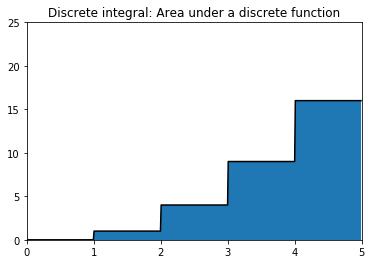

In [37]:
plt.plot(x_range[:-1], f_x[:-1], c="k")
plt.fill_between(x_range[:-1], -1, f_x[:-1])
plt.ylim(0,L**2)
plt.xlim(0,L)
plt.title("Discrete integral: Area under a discrete function")

We just need some basic geometry to get a formula for the area. As you can see in the graph, the figure can be subdivided into non-overlapping rectangles. therefore, the area under the curve is equal to the sum of the area of all these rectangles:

$$
A = \sum_{n=0}^4 A_n~.
$$

where $A_n$ denotes the area of the rectangle with $x$ coordinate ranging from $n$ to $n+1$. The area of the $n-th$ triangle is obtained by multyplying its base with its hight:

$$
A_n = \underbrace{f(n)}_\text{height} \cdot \underbrace{\Delta x}_\text{base} ~.
$$

where in our current case $\Delta x$ is equal to $1$.

Therefore, the formula for the area is:

$$
A = \sum_{n=0}^4 f(n) \Delta x
$$

We call this formula the DISCRETE INTEGRAL of the function.

The following block of python code computes the discrete integral of the function:

In [39]:
Dx = 1
range_n = range(5)
f = lambda n: n**2

def discrete_integral(f, range_n, Dx):
    return sum([f(n)*Dx for n in range_n])

print("the value of the discrete integral is: {}".format(discrete_integral(f, range_n, Dx)))

the value of the discrete integral is: 30


### Finite differences

Calculus is the study of change. In the case of discrete caclulus, we can characterize changes in a discrete functions using finite differences. As we saw in the previous section, we denote a finite difference in the $x$ coordinate as $ \Delta x $.

Similarly, we denote $\Delta f(x_n)$ as the difference between $f(n+1)$ and $f(n)$. We can wrete this as follows:

$$
\Delta f(x_n) = f(x_n + \Delta x) - f(x_n)
$$

where $x_n$ is the $x$ coordinate equal to $n \cdot \Delta x$ (which is equal to $n$ in our case as $\Delta x$ is equal to 1.).

#### Example

Consider the finite difference of the function:

$$
f(x_n) = x_n^2
$$

Using the definition:

$$
\Delta f(x_n) = f(x_n + \Delta x) - f(x_n)~.
$$

We know that $x_n = n \Delta x$, therefore:

$$
\begin{aligned}
\Delta f(x_n) &= f((n+1) \Delta x) - f(x_n) = (n+1)^2 (\Delta x)^2 - (\Delta x)^2 n^2 \\
              &= (n^2 + 2n + 1) (\Delta x)^2 - (\Delta x)^2 n^2 \\
              &= (2n + 1) (\Delta x)^2
\end{aligned}
$$

#### Exercises
1) Compute the finite differences of the following discrete functions defined for the integers $0, 1, 2, 3, 4$:

- $f_1(x_n) = x_n$
- $f_2(x_n) = 3 x_n^3$
- $f_3(x_n) = 2 x_n^2 + 4 x_n$

2) (Hard) Find a general formula for the finite differences of a function of the following form:
$$
f(x_n) = a ~ x_n^k
$$
where both $a$ and $k$ are positive integers.

#### Product rule for finite differences
we can now derive a product rule for finite differences. The goal is to have a formula relating the finite differences of two discrete function $f(x_n)$ and $g(x_n)$ and the funite difference of their product $f(x_n) \cdot g(x_n)$. We can derive this formula by writing down the definituion of the finite difference of the product and using the definitions again individually for $f$ and $g$:

\begin{aligned}
    \Delta(f(x_n) g(x_n)) &= \color{blue}{f(x_n + \Delta x)} \color{red}{g(x_n + \Delta x)} - f(x_n)g(x_n) \\
                          &= \color{blue}{\left( f(x_n) + \Delta f(x_n) \right)} \color{red}{\left( g(x_n) + \Delta g(x_n) \right)} - f(x_n)g(x_n) \\
                          &= f(x_n) \Delta g(x_n) + g(x_n) \Delta f(x_n) + \Delta f(x_n) \Delta g(x_n)
\end{aligned}

#### Example

the function:

$$
f_p(n) = n^2
$$

is the product of $f(n) = n$ with itself. Therefore:

$$
\begin{aligned}
\Delta f_p(x_n) &= \Delta (f(x_n) f(x_n) ) \\
                &= f(x_n) \Delta f(x_n) + f(x_n) \Delta f(x_n) + (\Delta f(x_n))(\Delta f(x_n))
                &= 2 f(x_n) \Delta f(x_n) + (\Delta f(x_n))^2 \\
                &= 2 (\Delta x_n) (\Delta x n) + (\Delta x )^2 \\
                & = (\Delta x)^2 (2 n + 1)
\end{aligned}
$$

since $\Delta f(x_n) = \Delta x$.

#### Exercises

Compute the discrete derivative of $f(n) = n^3$ using the product rule.

### The discrete derivative

The discrete derivative capture the "discrete rate of change" of a discrete function. It is defined as the ration between its finite difference and the finite difference in the $x$ coordinates:

$$
\frac{\Delta f}{\Delta x} = \frac{f(x_n + \Delta x) - f(x_n)}{\Delta x}
$$

#### Example

the product rule for the discrete function $f(x_n) = x_n^2$ can be obtained simply by deviding its finite difference by $\Delta x$:

$$
\frac{\Delta x_n^2}{\Delta x} = \frac{(\Delta x)^2 (2n + 1)}{\Delta x} = (2n + 1) ~\Delta x
$$

#### Exercises
Compute the discrete derivatives of the following discrete functions:

- $f_1(x_n) = 3 x_n$
- $f_2(x_n) = 2 x_n^2 + x_n^3$
- $f_3(x_n) = 2 x_n^2 + 4 x_n$

#### Product rule for discrete derivatives

The product rule for discrete derivatives can be obtained by deviding the product rule for finite differences by $\Delta x$:

$$
\begin{aligned}
\frac{\Delta (f(x_n) \cdot g(x_n))}{\Delta x} &= \frac{f(x_n) \Delta g(x_n) + g(x_n) \Delta f(x_n) + (\Delta f(x_n)) (\Delta g(x_n))}{{\Delta x}} \\
&= f(x_n) \frac{\Delta g(x_n)}{\Delta x} + g(x_n) \frac{\Delta f(x_n)}{\Delta x} + \frac{\Delta f(x_n)}{\Delta x} \frac{\Delta g(x_n)}{\Delta x} \Delta x
\end{aligned}
$$

nota that if we reduce the spacing between the discrete points so that $\Delta x \approx 0$, then the product rule can be approximated as follows:

$$
\frac{\Delta (f(x_n) \cdot g(x_n))}{\Delta x} \approx f(x_n) \frac{\Delta g(x_n)}{\Delta x} + g(x_n) \frac{\Delta f(x_n)}{\Delta x}
$$

since the last term becomes smaller and smaller.

### The discrete integral

As we explained in the previous section, we can define discrete integrals as follows:

$$
\sum_{n=0}^N f(x_n) \Delta x
$$

We can also take the discrete integral of a discrete function $f(x_n)$ with respect to the finite difference of another discrete function $g(x_n)$:

$$
\sum_{n=0}^N f(x_n) \Delta g(x_n) = \sum_{n=0}^N f(x_n) (g(x_{n + 1}) - g(x_n))
$$

the previous definition is a special case of this with $g(x_n) = x_n$ (Exercise: derive this!).

#### Discrete integral of a finite difference
Consider the following discrete integral:

$$
\sum_{n=0}^N \Delta g(x_n) = \sum_{n=0}^N (g(x_{n + 1}) - g(x_n))~.
$$

this sum has a very nice property. it is called telescopic sum, its terms with plus and minus sign pair up exactly so that only the first and the last survive!

$$
\begin{aligned}
\sum_{n=0}^N (g(x_{n + 1}) - g(x_n)) &= (\color{red}{g(x_1)} - g(x_0)) + (\color{green}{g(x_2)} \color{red}{- g(x_1)}) + (\color{blue}{g(x_3)} \color{green}{- g(x_2)})~ + ... +~ (g(x_N) - \color{purple}{g(x_{N-1})})\\
&= -g(x_0) + (\color{red}{g(x_1) - g(x_1)})~ + ... +~ (\color{purple}{g(x_{N-1}) - g(x_{N-1})}) + g(x_N)\\
&= -g(x_0) + \color{red}{0}~ + ... +~ \color{purple}{0} + g(x_N)\\
&= g(x_N) - g(x_0)
\end{aligned}
$$

Therefore:

$$
\sum_{n=0}^N \Delta g(x_n) = g(x_N) - g(x_0)~.
$$

In words, the integral of a finite difference is equal of the total difference of its function.

### Connecting discrete integrals and discrete derivatives: The foundamental theorem of discrete calculus

$$
\sum_{n=0}^N \frac{\Delta f}{\Delta x} \Delta x = \sum_{n=0}^N \Delta f(x_n) = 
$$

## Calculus in the wrong way

### From finite differences to differentials

#### those spooky infinitesimals

### The discrete integral

### Finite differences: the discrete derivative

### Connecting integrals and derivatives: The foundamental theorem of calculus